# **Classification Mobile-Price utilisant KNN**

L'objectif de ce projet est de développer un modèle de classification pour un ensemble de données qui contient les spécifications de 2000 téléphones mobiles et de tenter de prédire les meilleures gammes de prix en appliquant l'algorithme KNN.

## 1 - Les données et la problématique

D'abord, parlons du jeu de données que nous allons utiliser. C'est une dataset de Mobile Price Classification contenant les spécifications de 2000 téléphones mobiles et de tenter de prédire les meilleures gammes de prix.

Notre Target est prive range, on quatre gamme de prix [0, 1, 2, 3].

La variable cible est indiquée comme suit :
* 0 coût faible (low cost)
* 1 coût moyen (medium cost)
* 2 coût élevé (high cost)
* 3 coût très élevé (very high cost)

### - Description des donnees

* battery_power: Énergie totale qu'une batterie peut stocker en mAh
* blue: a bluetooth ou non
* clock_speed: Vitesse à laquelle le microprocesseur exécute les instructions
* dual_sim: a dual sim support ou non
* fc: Caméra frontale méga pixels
* four_g: a 4G ou non
* int_memory: Mémoire interne en gigaoctets
* m_dep: Profondeur du mobile en cm
* mobile_wt: Poids du téléphone portable
* n_cores: Nombre de cœurs du processeur
* pc: Pixel Resolution Width
* px_height: Résolution des pixels en hauteur
* px_width: Résolution des pixels en largeur
* ram: Mémoire vive en mégaoctets
* sc_h: Hauteur de l'écran du mobile en cm
* sc_w: Largeur de l'écran du mobile en cm
* talk_time: Durée maximale d'utilisation de la batterie lors d'un appel
* three_g: a 3G ou non
* touch_screen: a touch screen ou non
* wifi: a wifi ou non


## 2 - Importer les donnees

### 2-1 - Importer les bibliotheques necessaires

In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # Algebre lineaire
import pandas as pd # Traitement de donnees, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualisation des donnees
import missingno as msno # Fournit une série de visualisations permettant de comprendre la présence et la distribution des données manquantes dans un cadre de données pandas.
import matplotlib.pyplot as plt # Visualisations statiques, animées et interactives en Python
from sklearn.feature_selection import chi2 # Calculer les statistiques du chi carré entre chaque caractéristique non-négative et la classe
from sklearn.feature_selection import SelectKBest # Sélectionne les caractéristiques en fonction des k scores les plus élevés
from sklearn.decomposition import PCA # Décomposition des données pour les projeter dans un espace de dimension inférieure
from sklearn import decomposition, preprocessing # Réduction linéaire de la dimensionnalité à l'aide de la décomposition en valeurs singulières des données afin de les projeter dans un espace de dimension inférieure
from matplotlib.collections import LineCollection
from scipy.cluster.hierarchy import dendrogram
from sklearn.model_selection import train_test_split # Divisez des tableaux ou des matrices en sous-ensembles aléatoires de formation et de test
from sklearn import metrics # Met en œuvre plusieurs fonctions de perte, de score et d'utilité pour mesurer les performances de classification
from sklearn import model_selection
from sklearn import neighbors # Fournit des fonctionnalités pour les méthodes d'apprentissage non supervisées et supervisées basées sur le voisinage
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix # Mesure la qualité des prédictions d'un algorithme de classification, Score d'exactitude de la classification, Calculer la matrice de confusion pour évaluer la précision d'une classification

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/mobile-price-classification'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/mobile-price-classification/train.csv
../input/mobile-price-classification/test.csv


### 2-2 - Importation et visualisation des donnees

In [90]:
train = pd.read_csv('../input/mobile-price-classification/train.csv')
test = pd.read_csv('../input/mobile-price-classification/test.csv')

In [91]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [92]:
train.keys() #different variables existant

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [93]:
train.shape

(2000, 21)

In [94]:
test.shape

(1000, 21)

In [95]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## 3 - Analyse statistique des donnees

### 3-1 - Analyse descriptive

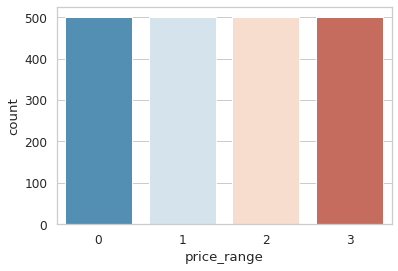

In [96]:
# comptes de price_range

sns.set(font_scale=1.1)
sns.set_style('whitegrid')
sns.countplot(x='price_range',data=train,palette='RdBu_r');

Nous pouvons voir ici que la répartition des gammes de prix est exactement de 25% par gamme de prix - c'était inattendu, mais cela signifie également que nous n'aurons pas besoin d'appliquer des méthodes spéciales pour égaliser l'ensemble de données.

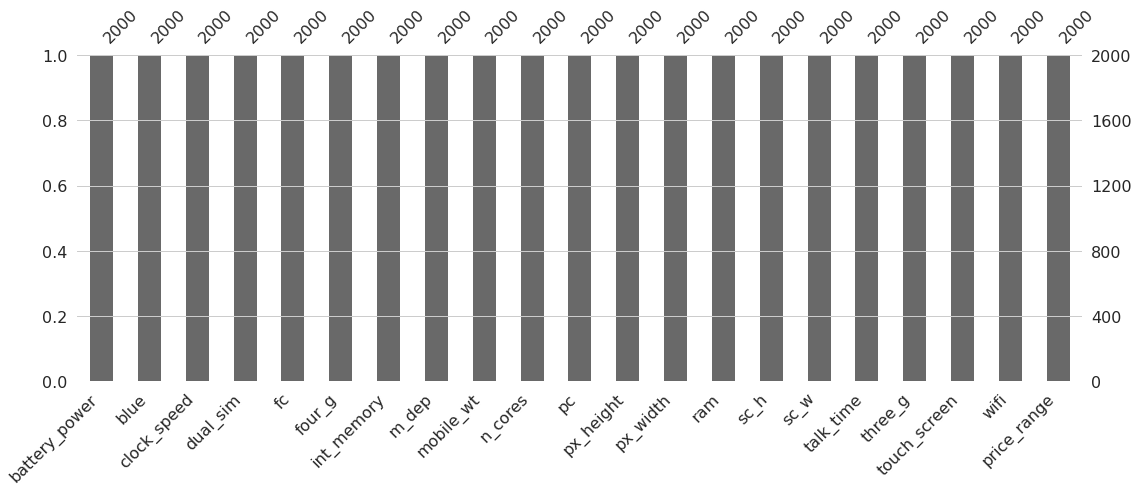

In [97]:
# Montrer toutes les valeurs manquantes
msno.bar(train, figsize=(18, 6));

Les données sont très "propres" dans la plupart des aspects, ne contenant aucune valeur manquante.

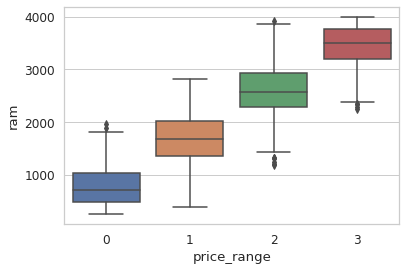

In [98]:
sns.boxplot(x="price_range", y="ram", data=train);

#### a - Feature selection

Des tests statistiques peuvent être utilisés pour sélectionner les caractéristiques qui ont la relation la plus forte avec la variable de sortie.

La bibliothèque scikit-learn fournit la classe SelectKBest qui peut être utilisée avec une série de tests statistiques différents pour sélectionner un nombre spécifique de caractéristiques.

L'exemple ci-dessous utilise le test statistique du chi carré (chi²) pour les caractéristiques non négatives afin de sélectionner k (k=12) des meilleures caractéristiques dans l'ensemble de données de prédiction de la gamme de prix des téléphones portables.


In [99]:
#separer le jeu de donnees

X = train.drop('price_range',axis=1) 
y = train['price_range']
print(X.shape)
print(y.shape)

(2000, 20)
(2000,)


In [100]:
#Appliquer la classe SelectKBest pour extraire les 12 meilleures caractéristiques.
BestFeatures = SelectKBest(score_func=chi2, k=12)
fit = BestFeatures.fit(X,y)

In [101]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

In [102]:
#concaténation de deux cadres de données pour une meilleure visualisation

f_Scores = pd.concat([df_columns,df_scores],axis=1) #feature scores
f_Scores.columns = ['Specs','Score']  

In [103]:
f_Scores  #La valeur du score est directement proportionnelle à l'importance de la caractéristique.

,Specs,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [104]:
print(f_Scores.nlargest(12,'Score')) #imprimer les 12 meilleures caractéristiques en ordre décroissant      

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878
10             pc       9.186054
9         n_cores       9.097556


En utilisant le score ci-dessus, nous pouvons conclure que "ram" est la caractéristique la plus importante parmi toutes les caractéristiques, ce qui est également vrai dans un scénario pratique. Lorsque le ram de mobiles augmente, le prix augmente également.

### 3-2 - ACP

In [105]:
# on laisse juste les 12-bestfeatures et on elimine les restants
data_train = train.drop(['blue', 'dual_sim', 'four_g', 'three_g',
       'touch_screen', 'wifi', 'clock_speed', 'm_dep'], axis=1)


       
data_train.head()

,battery_power,fc,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,1,7,188,2,2,20,756,2549,9,7,19,1
1,1021,0,53,136,3,6,905,1988,2631,17,3,7,2
2,563,2,41,145,5,6,1263,1716,2603,11,2,9,2
3,615,0,10,131,6,9,1216,1786,2769,16,8,11,2
4,1821,13,44,141,2,14,1208,1212,1411,8,2,15,1


In [106]:
data_test = test.drop(['blue', 'dual_sim', 'four_g', 'three_g',
       'touch_screen', 'wifi', 'clock_speed', 'm_dep'], axis=1)

data_test.head()

,id,battery_power,fc,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,1,1043,14,5,193,3,16,226,1412,3476,12,7,2
1,2,841,4,61,191,5,12,746,857,3895,6,0,7
2,3,1807,1,27,186,3,4,1270,1366,2396,17,10,10
3,4,1546,18,25,96,8,20,295,1752,3893,10,0,7
4,5,1434,11,49,108,6,18,749,810,1773,15,8,7


#### a - Analyse statistique

On peut mener une premiere analyse statistique des donnees en tracant les boxplots (boites a moustache) des variables:

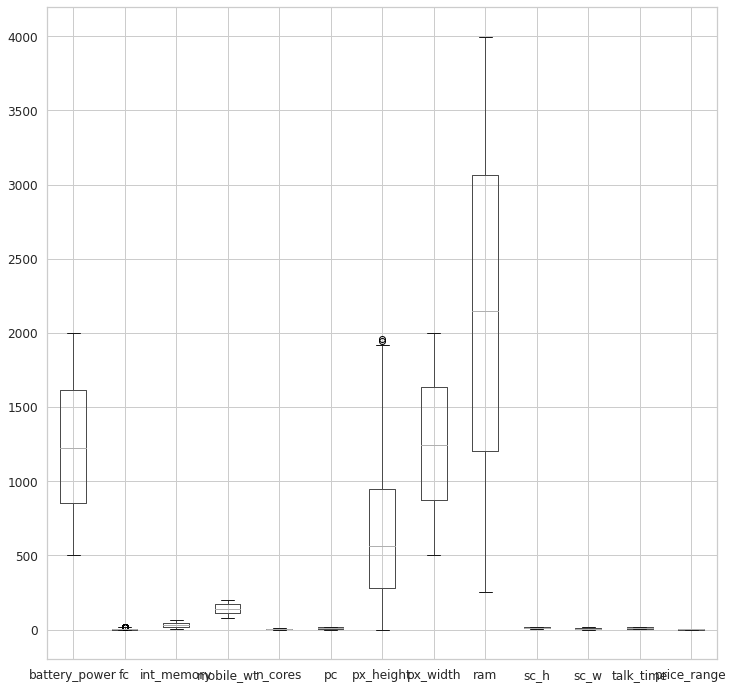

In [107]:
boxplot = data_train.boxplot(figsize=(12,12));

* Les variables n'ont pas les memes ordres de grandeur (fc, pc prennent de petites valeurs comparativement a ram ou px_width).

* Les variables ram, battery_power ont une grande variance alors que d'autres comme int_memory ou sc_h varient peu en proportion.

--> fc, px_height présentent quelques valeurs atypiques.

#### b - Utilisation de l'ACP

In [108]:
data_train.corr()

,battery_power,fc,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
battery_power,1.000000,0.033334,-0.004004,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.200723
fc,0.033334,1.000000,-0.029133,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.021998
int_memory,-0.004004,-0.029133,1.000000,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,0.044435
mobile_wt,0.001844,0.023618,-0.034214,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,-0.030302
n_cores,-0.029727,-0.013356,-0.028310,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,0.004399
pc,0.031441,0.644595,-0.033273,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657,0.033599
px_height,0.014901,-0.009990,0.010441,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.020352,0.059615,0.043038,-0.010645,0.148858
px_width,-0.008402,-0.005176,-0.008335,0.000090,0.024480,0.004196,0.510664,1.000000,0.004105,0.021599,0.034699,0.006720,0.165818
ram,-0.000653,0.015099,0.032813,-0.002581,0.004868,0.028984,-0.020352,0.004105,1.000000,0.015996,0.035576,0.010820,0.917046
sc_h,-0.029959,-0.011014,0.037771,-0.033855,-0.000315,0.004938,0.059615,0.021599,0.015996,1.000000,0.506144,-0.017335,0.022986


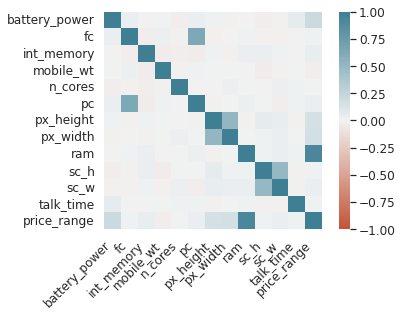

In [109]:
corr=data_train.corr()
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(
corr,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(20, 220, n=200),
square=True
)
ax.set_xticklabels(
ax.get_xticklabels(),
rotation=45,
horizontalalignment='right'
);

C est symétrique, avec des 1 sur la diagonale (normal car une variable est forcément fortement correlée avec elle-même). On a, par exemple, que la variable ram a coefficient de corrélation de 0.91.

In [110]:
y_train = data_train['price_range']
X_train = data_train.drop('price_range', axis=1)
X_test = data_test.drop('id' , axis=1)

Comme nous l'avons déjà remarqué, il est difficile de visualiser des données de grande dimension. Nous pouvons utiliser l'ACP pour trouver les deux premières composantes principales et visualiser les données dans ce nouvel espace bidimensionnel, avec un seul nuage de points. Mais avant cela, nous devons mettre nos données à l'échelle afin que chaque caractéristique ait une variance unitaire.

In [111]:
pca = PCA(n_components=2)
X = preprocessing.StandardScaler(with_std=False).fit_transform(X_train)
pca_result = pca.fit_transform(X)

print(pca.explained_variance_ratio_)

[0.67044024 0.16517933]


L'ACP avec Scikit Learn utilise un processus très similaire aux autres fonctions de prétraitement fournies avec SciKit Learn. Nous instancions un objet PCA, trouvons les composantes principales à l'aide de la méthode fit, puis appliquons la rotation et la réduction de la dimensionnalité en appelant transform().

Nous pouvons également spécifier le nombre de composantes que nous souhaitons conserver lors de la création de l'objet PCA.

À partir du résultat ci-dessus, vous pouvez observer que la composante principale 1 contient 67 % de l'information, tandis que la composante principale 2 ne contient que 16.5 % de l'information. L'autre point à noter est qu'en projetant des données à 12 dimensions vers des données à deux dimensions, 16.5% de l'information a été perdue.

In [112]:
print(X.shape)
print(pca_result.shape)

(2000, 12)
(2000, 2)


Nous avons réduit 12 dimensions à seulement 2.

Traçons ces deux dimensions:

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  This is separate from the ipykernel package so we can avoid doing imports until


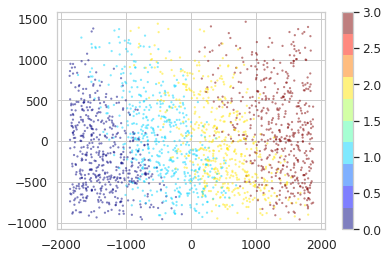

In [113]:
plt.scatter(pca_result[:4000, 0], pca_result[:4000, 1], c=y_train[:4000], edgecolor='none', alpha=0.5,
           cmap=plt.get_cmap('jet', 10), s=5)
plt.colorbar();

Il est clair qu'en utilisant ces deux composants, nous pouvons facilement séparer ces quatre classes.

In [114]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)

print(pca.explained_variance_ratio_)

[0.67044024 0.16517933 0.11006173]


À partir du résultat ci-dessus, vous pouvez observer que la composante principale 1 contient 67 % de l'information, tandis que la composante principale 2 ne contient que 16.5 % de l'information et la composante principale 3 contient 11 % de l'information. L'autre point à noter est qu'en projetant des données à 12 dimensions vers des données à trois dimensions, juste 5.5% de l'information a été perdue.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  This is separate from the ipykernel package so we can avoid doing imports until


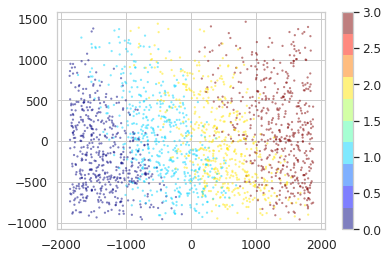

In [115]:
plt.scatter(pca_result[:4000, 0], pca_result[:4000, 1], c=y_train[:4000], edgecolor='none', alpha=0.5,
           cmap=plt.get_cmap('jet', 10), s=5)
plt.colorbar();

In [116]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

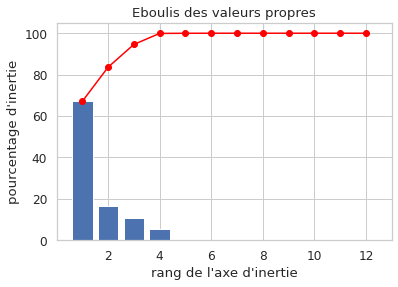

In [117]:
pca = decomposition.PCA(n_components= 12)
pca.fit(X)
display_scree_plot(pca)

94.5 % de l'information est expliquee par 3 composantes principales.

In [118]:
pca = PCA(n_components=3)
X_train_transformed = pca.fit_transform(X)
X_test_transformed = pca.transform(X_test)

## 4 - Modele KNN

### 4-1 - Séparer training / testing set

On separe notre dataset en deux *training set* et *testing set*.

On va utiliser uniquement le training set pour entraîner notre modèle et on garde le testing set pour plus tard. On utilise la répartition classique 80/20 entre training et testing set.

In [119]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split( 
    X_train_transformed, y_train, test_size=0.2, random_state=21)

### 4-2 - Le KNN

On peut créer un premier classifieur 5-NN, c'est-à-dire qui prend en compte les 5 plus proches voisins pour la classification. Pour cela, on va utiliser l'implémentation de l'algorithme qui existe dans la librairie scikit-learn :

In [120]:
knn = neighbors.KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_pca, y_train_pca)

KNeighborsClassifier(n_neighbors=4)

Testons à présent l’erreur de notre classifieur. La méthode  score  effectue exactement ça : tester les performances de prédiction d'un classifieur dans lequel on passe un jeu de données annoté — dans notre cas le jeu de données de test. Il renvoie ainsi le pourcentage de prédiction véridique trouvée par le classifieur.

In [121]:
error = 1 - knn.score(X_test_pca, y_test_pca)
print('Erreur: %f' % error)

Erreur: 0.062500


#### a - Optimisation du score sur les données test

Pour trouver le k optimal, on va simplement tester le modèle pour tous les k de 2 à 15, mesurer l’erreur test et afficher la performance en fonction de k :

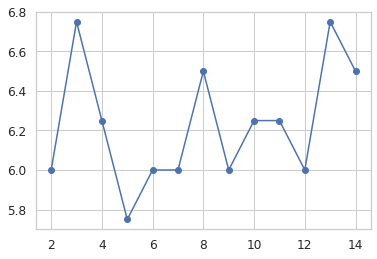

In [122]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train_pca, y_train_pca).score(X_test_pca, y_test_pca)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

Comme on peut le voir, le k-NN le plus performant est celui pour lequel k = 5. On connaît donc notre classifieur final optimal : 5-nn. Ce qui veut dire que c'est celui qui classifie le mieux les données, et qui donc dans ce cas précis reconnaît au mieux les prix des mobiles.

In [123]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train_pca)

KNeighborsClassifier()

In [124]:
error = 1 - knn.score(X_test_pca, y_test_pca)
print('Erreur: %f' % error)

Erreur: 0.057500


#### b - Validation croisee

On tilise la méthode "GridSearchCV" pour faire une validation croisée du paramètre k d'un kNN sur le jeu d'entraînement.

In [125]:
#Séparons nos données en un jeu d’entraînement et un jeu de test. Le jeu de test contiendra 30% des données
X_train, X_test, y_train, y_test = model_selection.train_test_split(train, train['price_range'],test_size=0.3 )

# Fixer les valeurs des hyperparamètres à tester 
param_grid = {'n_neighbors':[2, 4, 5, 7, 11, 13, 15]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(), # un classifieur kNN
param_grid, # hyperparamètres à tester
cv=5, # nombre de folds de validation croisée
scoring=score # score à optimiser
)

In [126]:
# Optimiser ce classifieur sur le jeu d'entraînement
# clf.fit(X_train, y_train)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 5, 7, 11, 13, 15]},
             scoring='accuracy')

In [127]:
# Afficher le(s) hyperparamètre(s) optimaux
print ("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:",clf.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'n_neighbors': 11}


In [128]:
# Afficher les performances correspondantes
print ("Résultats de la validation croisée :")
for mean, std, params in zip(clf.cv_results_['mean_test_score'], # score moyen
    clf.cv_results_['std_test_score'], # écart-type du score
    clf.cv_results_['params'] # valeur de l'hyperparamètre
):
    print("\t%s = %0.3f (+/-%0.03f) for %r" % (score, # critère utilisé
mean, # score moyen
std * 2, # barre d'erreur$
params # hyperparamètre
))

Résultats de la validation croisée :
	accuracy = 0.895 (+/-0.031) for {'n_neighbors': 2}
	accuracy = 0.906 (+/-0.031) for {'n_neighbors': 4}
	accuracy = 0.914 (+/-0.040) for {'n_neighbors': 5}
	accuracy = 0.919 (+/-0.034) for {'n_neighbors': 7}
	accuracy = 0.923 (+/-0.025) for {'n_neighbors': 11}
	accuracy = 0.919 (+/-0.021) for {'n_neighbors': 13}
	accuracy = 0.920 (+/-0.028) for {'n_neighbors': 15}


La meilleure performance (-0.923) est ici atteinte avec 11 voisins.
Les performances obtenues dépendent des jeux d'entraînement et de validation, on peut maintenant regarder la performance sur le jeu de test. GridSearchCV a
automatiquement ré-entraîné le meilleur modèle sur l'intégralité du jeu d'entraînement.

In [129]:
y_pred = clf.predict(X_test)
print ("\nSur le jeu de test : %0.3f" % metrics.accuracy_score(y_test, y_pred))


Sur le jeu de test : 0.942


In [130]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[161   4   0   0]
 [  5 132   5   0]
 [  0   8 136   4]
 [  0   0   9 136]]


In [131]:
# raport de classification
print(classification_report(y_test, y_pred, target_names = ['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       165
           1       0.92      0.93      0.92       142
           2       0.91      0.92      0.91       148
           3       0.97      0.94      0.95       145

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



In [132]:
print(accuracy_score(y_test, y_pred))

0.9416666666666667


En conclusion, Le modèle KNN donne une précision d'environ 94% pour les données de classification des prix des téléphones portables.